# Notebook Modelo 

Esse notebook é um notebook modelo para aplicação dos algoritmos aos datasets deste trabalho. O input deste notebook são os 4 datsets, sendo que dois deles são com os dados tratados e outros dois para além do tratamento dos dados têm a normalização dos dados.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pickle


## Importando datasets

Aqui mencionamos que usaremos dois tipos de datasets, os com tratamento dos dados e outros dois que para além do tratamento encontram-se normalizados.

#### Datasets Tratados

In [19]:
data_train = pd.read_csv('./../datasets/df_train.csv')
data_test = pd.read_csv('./../datasets/df_test.csv')

In [20]:
data_test.head()

,age,education,capital_gain,capital_loss,hours_per_week,status_civic,target
0,25,7,0,0,40,1,0
1,38,9,0,0,50,0,0
2,28,12,0,0,40,0,1
3,44,10,7688,0,40,0,1
4,34,6,0,0,30,1,0


#### Datasets Normalizados

In [21]:
data_train_norm = pd.read_csv('./../datasets/train_normalize.csv')
data_test_norm = pd.read_csv('./../datasets/test_normalize.csv')

In [22]:
data_train_norm.head()

,age,education,capital_gain,capital_loss,hours_per_week,status_civic,target
0,0.301370,0.800000,0.02174,0.0,0.397959,1.0,0
1,0.452055,0.800000,0.00000,0.0,0.122449,0.0,0
2,0.287671,0.533333,0.00000,0.0,0.397959,1.0,0
3,0.493151,0.400000,0.00000,0.0,0.397959,0.0,0
4,0.150685,0.800000,0.00000,0.0,0.397959,0.0,0


### Informação Importante
Como já mencionado no notebook sobre análise dos dados, o dataset de treino sofre de um desbalanceamento muito grande.
Veja o gráfico abaixo:




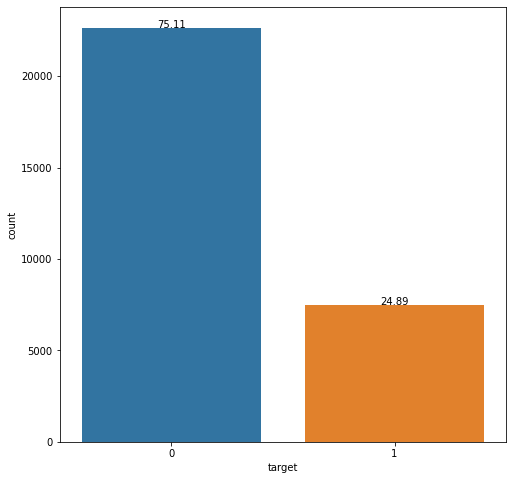

In [23]:
plt.figure(figsize=(8,8))
total = float(len(data_train) )

ax = sns.countplot(x="target", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center") 
    
plt.show()

In [24]:
def plot_cm(y_true, y_pred, figsize=(6,6)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
    ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

# Explicando o fluxo

Faremos o treinamento de cada algoritmo. Para esse notebook modelo será usado um algoritmo de regressão logistica, seguindo a seguinte ordem:

1. Treina-se com os datasets desbalanceados:
    - Datasets com tratamento dos dados
    - Datasets com tratamento mais normalização

Em seguida escolheremos qual dataset irá seguir para testar com métodos under, over sampling e o mix dos dois metódos. Os resultados, serão avaliados, os quais iremos levar em consideração os seguintes paramêtros: accuracia e a recall de cada classe em especial a classe 1.

Para além disso, a matriz será um paramêtro de escolha. Pois é preferível que tenhamos mais falso positivo do que falso negativo. Isso quer dizer que, melhor classificarmos que irá ganhar menor ou igual a 50k por ano e ela ganhar mais em relação a situação contrária. No entanto, vale ressaltar que não devemos esquecer a accuracia e a recall de cada classe nessa decisão.

     
     
   

# 1 Treina-se com os dataset desbalanceado:

In [25]:
def trainModel(df_train,df_test, model,result):
    X_train, X_test = df_train.drop("target", axis = 1),df_test.drop("target", axis = 1)
    y_train, y_test = df_train.target,df_test.target
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Resultados do ', result)
    print('Acurácia:\n', acc)
    print('Report dos parametros:\n')
    print (classification_report(y_test, y_pred))
    print('Matriz de confusão:\n')
    plot_cm(y_test, y_pred)

#### Datasets Tratado

Resultados do  Dataset com tratamento dos dados.
Acurácia:
 0.8268260292164674
Report dos parametros:

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11360
           1       0.67      0.58      0.62      3700

    accuracy                           0.83     15060
   macro avg       0.77      0.74      0.75     15060
weighted avg       0.82      0.83      0.82     15060

Matriz de confusão:



<ipython-input-24-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-24-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


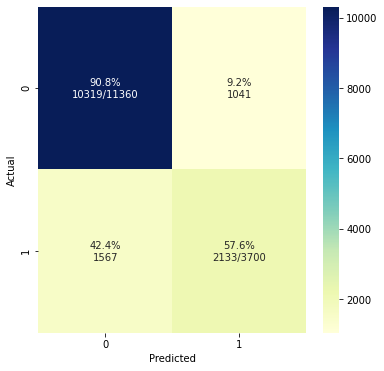

In [26]:
result = 'Dataset com tratamento dos dados.'
model = DecisionTreeClassifier()
trainModel(data_train,data_test, model, result)

#### Datasets Normalizado

Resultados do  Dataset com tratamento dos dados e normalização.
Acurácia:
 0.8115537848605577
Report dos parametros:

              precision    recall  f1-score   support

           0       0.85      0.90      0.88     11360
           1       0.64      0.53      0.58      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.72      0.73     15060
weighted avg       0.80      0.81      0.81     15060

Matriz de confusão:



<ipython-input-24-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-24-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


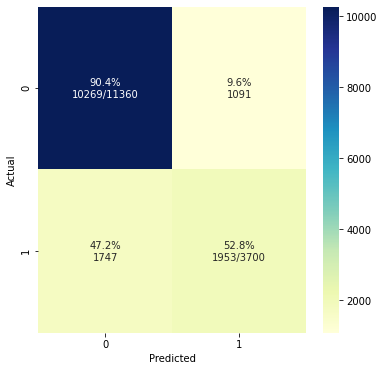

In [27]:
result = 'Dataset com tratamento dos dados e normalização.'
model = DecisionTreeClassifier()
trainModel(data_train_norm,data_test_norm, model, result)

# Comparação

|     Logistic regression| Accuracy | Precision | Precision | Recall   | Recall   | Matriz | Matriz|           
|:-----------:           |:--------:|:--------:|:---------:|:---------:|:--------:|:---------:|:--------:|
|                        |          | classe 0  | classe 1 |  classe 0 | classe 1 |  FP       | FN        
|    Dataset tratado     |  0.8233  |     0.85  |    0.69  |    0.93   | 0.51     | 0.073     | 0.494
|    Dataset normalizado |  0.8347  |     0.87  |    0.71  |    0.93   | 0.56     | 0.075     | 0.443


#### Decisão qual dataset usar :

Mediante aos resultados acima podemos ver que dataset normalizado atende aos critérios que definimos para escolher o melhor algoritmo. Desta forma, vamos adotar nos proximos modelos os datasets normalizados e concomitantemente iremos aplicar métodos para otimizar os resuldos uma vez que o dataset encontra-se desbalanceado.

Iremos adotar os seguintes métodos 

 1. **O método de Over Sampling:**

   - Aumenta-se a classe minoritária com dados sinteticos, para se igualar a classe majoritária.
   
    
2. **O método de Under Sampling:**
     
     - Diminui-se a classe  majoritária deletando dados desta, para ela se igualar a classe minoritária.
     
     
3. **O método da Equipa 9:**
    
    - Esse método é resultado da combinação dos dois métodos anteriores.



### 1 - Over Sampling

In [28]:
def trainMethodOver(df_train,df_test, model):
    X = df_train.drop("target", axis = 1)
    y = df_train.target
    smt = SMOTE()
    X, y = smt.fit_sample(X, y)
    print('Base de dados')
    ax = sns.countplot(x=y)
    X_train, X_test = X,df_test.drop("target", axis = 1)
    y_train, y_test = y,df_test.target
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Acurácia:\n', acc)
    print('Report dos parametros:\n')
    print (classification_report(y_test, y_pred))
    print('Matriz de confusão:\n')
    plot_cm(y_test, y_pred)

Base de dados
Acurácia:
 0.8033864541832669
Report dos parametros:

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     11360
           1       0.57      0.78      0.66      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.80      0.76     15060
weighted avg       0.83      0.80      0.81     15060

Matriz de confusão:



<ipython-input-24-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-24-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


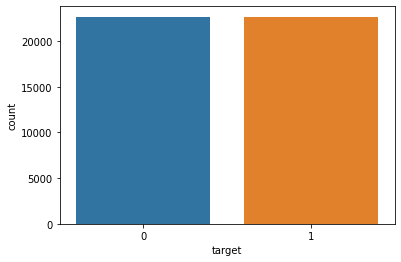

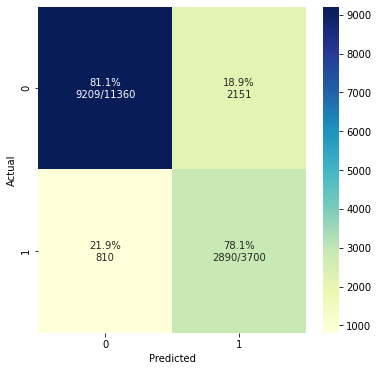

In [29]:
modelOver = DecisionTreeClassifier()
trainMethodOver(data_train,data_test, modelOver)

A recall da classe 1 superou a classe 0, no entanto com a geração dos dados sinteticos da classe 1 podemos está produzindo um viés no modelo para classe 1. 

## 2 - Under Sampling

In [30]:
def trainMethodUnder(df_train,df_test, model):
    X = df_train.drop("target", axis = 1)
    y = df_train.target
    nr = NearMiss()
    X, y = nr.fit_sample(X, y)
    ax = sns.countplot(x=y)
    X_train, X_test = X,df_test.drop("target", axis = 1)
    y_train, y_test = y,df_test.target
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Acurácia:\n', acc)
    print('Report dos parametros:\n')
    print (classification_report(y_test, y_pred))
    print('Matriz de confusão:\n')
    plot_cm(y_test, y_pred)

Acurácia:
 0.5626162018592298
Report dos parametros:

              precision    recall  f1-score   support

           0       0.84      0.52      0.64     11360
           1       0.32      0.69      0.44      3700

    accuracy                           0.56     15060
   macro avg       0.58      0.61      0.54     15060
weighted avg       0.71      0.56      0.59     15060

Matriz de confusão:



<ipython-input-24-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-24-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


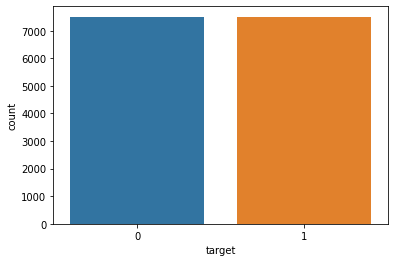

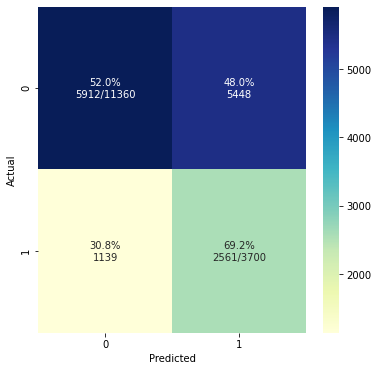

In [31]:
modelUnder = DecisionTreeClassifier()
trainMethodUnder(data_train,data_test, modelUnder)

Parece melhor que o método anterior, houve uma melhora na classificação da classe 1 sem superar a classe 0. Com isso não mostra um viés. No entanto, podemos está perdendo muita informação pois deitamos fora mais da metade dos registos da classe 0 para se igualar a classe 1.

## 3 - Método Equipa 9

In [32]:
def trainMethodTeam(df_train,df_test, model):
    X = df_train.drop("target", axis = 1)
    y = df_train.target
    ratio= np.bincount(data_train_norm.target)
    ratiot = ratio[0]/ratio[1]
 
    
    
    
    over = SMOTE(sampling_strategy=0.5,random_state=10)
    X, y = over.fit_sample(X, y)
    under =  RandomUnderSampler(sampling_strategy=0.8)
   
    X, y = under.fit_sample(X, y)
    print(np.bincount(y))
    
    
   
    print('Base de dados')
    ax = sns.countplot(x=y)
    X_train, X_test = X,df_test.drop("target", axis = 1)
    y_train, y_test = y,df_test.target
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Acurácia:\n', acc)
    print('Report dos parametros:\n')
    print (classification_report(y_test, y_pred))
    print('Matriz de confusão:\n')
    plot_cm(y_test, y_pred)

[14158 11327]
Base de dados
Acurácia:
 0.8054448871181938
Report dos parametros:

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     11360
           1       0.58      0.75      0.66      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.79      0.76     15060
weighted avg       0.83      0.81      0.81     15060

Matriz de confusão:



<ipython-input-24-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-24-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


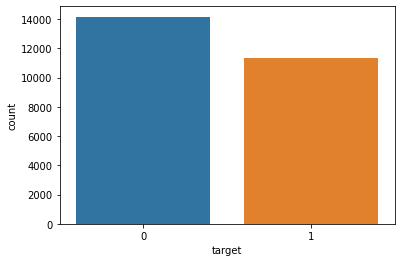

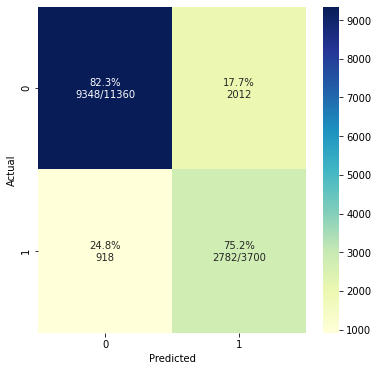

In [33]:
modelTeam = DecisionTreeClassifier()
trainMethodTeam(data_train,data_test, modelTeam)

# Resultados

Levando em consideração a accuracia e a recall bem como outros parametros como falso positivo e falso negativo, o melhor modelo para esse algoritmo aqui testado seria o ultimo modelo. Esse com metodo construído pela equipa 9, um misto do método under e over sampling. Desta forma, iremos salvar o ultimo modelo. Pois caso este seja escolhido o melhor iremos colocar em produção.

In [34]:
#pickle.dump(modelTeam, open('modelo.pkl', 'wb'))